# BBWS Model

### BBWS model is short for Bianconi Barabasi Watts Strogatz, and this BBWS model refers to a crossover of the WS and BB model that has already been established, and aims to create a model that can achieve high clustering together with a scale free degree distribution.

The model works as a Watts-Strogatz model would, initialising with a graph of $n$ nodes and each node connected to $k/2$ immediate neighbours on the left and right. When rewiring however, the edge is rewired with preferential attachment, and considering a fitness factor, $\eta$, that is normally distributed for each node.

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

def bbws(n, k, beta):
    
    # Creating a list of fitness factors for the nodes
    etas = np.array([-1])
    while any(etas<0) or any(etas>1):
        etas = np.random.normal(0.5, 1 / n, n)
        
    def p_factored(node):
        return etas[node]*g.degree(node)
    p_factored = np.vectorize(p_factored)
        
    g = nx.Graph()
    edges_initial = [(i, i+j+1) if i+j+1 < n else (i, i+j+1-n) for i in range(n) for j in range(int(k/2))]
    g.add_edges_from(edges_initial)
    
    for node in range(n):
        
        # A list of nodes which the edge can be rewired to are created
        nodes = list(range(n))
        nodes.remove(node)
                
        for i in range(int(k/2)):
        
            # b is a probability to determine if the edge created will be rewired, if it's less than beta
            b = np.random.ranf(1)
            if b <= beta:
                
                if node+i+1 < n:
                    g.remove_edge(node, node+i+1)
                else:
                    g.remove_edge(node, node+i+1-n)
                
                p_total = sum(p_factored(np.array(nodes)))
        
                def p_dist(node):
                    return p_factored(node) / p_total
                p_dist = np.vectorize(p_dist)

                p = p_dist(np.array(nodes))

                # The edge is then rewired by selecting a node and adding the edge
                choosing = True
                while choosing:
                    node_chosen = np.random.choice(nodes, p = p)
                    if g.has_edge(node_chosen, node):
                        continue
                    else:
                        g.add_edge(node_chosen, node)
                        choosing = False

    return g
        

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88858
Average degree:  44.0000
Global clustering coefficient: 0.011
Transitivity: 0.011
Diameter: 4


C:\Users\kjkchang\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


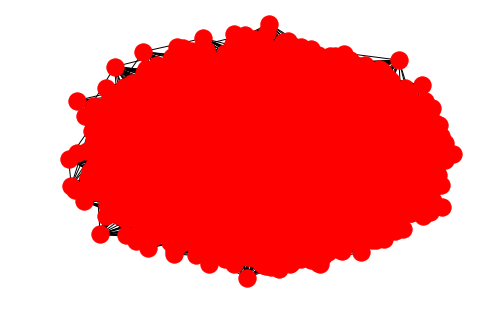

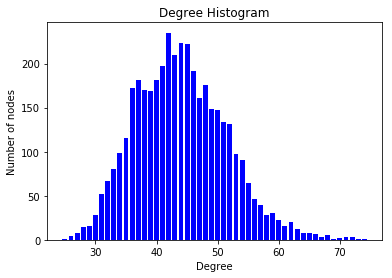

In [4]:
g = bbws(4039, 44, 1)
print(nx.info(g))
print(f"Global clustering coefficient: {np.round(nx.average_clustering(g), 4)}")
print(f"Transitivity: {np.round(nx.transitivity(g), 4)}")
print(f"Diameter: {np.round(nx.diameter(g), 4)}")
nx.draw(g)
plt.show()
plt.clf()

degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
count = Counter(degree_sequence)

plt.bar(count.keys(), count.values(), width=0.80, color='b')
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.show()